In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [13]:
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = True

In [59]:
ra = pd.read_excel('./ra.xlsx', header=None)
ra.drop(columns=1, inplace=True)
ra.columns = ['amp', 'label', 'data']
ra.fillna('', inplace=True)
ra.head()

,amp,label,data
0,0,,
1,0,Max1,1594.6878
2,0,HWHH,30.224
3,0,Integral,1.6444
4,0,,


In [60]:
k_calib, b_calib

(0.003073639323542316, -0.12667051862315754)

0.003073639323542316 -0.12667051862315754 [1.73026323e-05 3.49605024e-02]


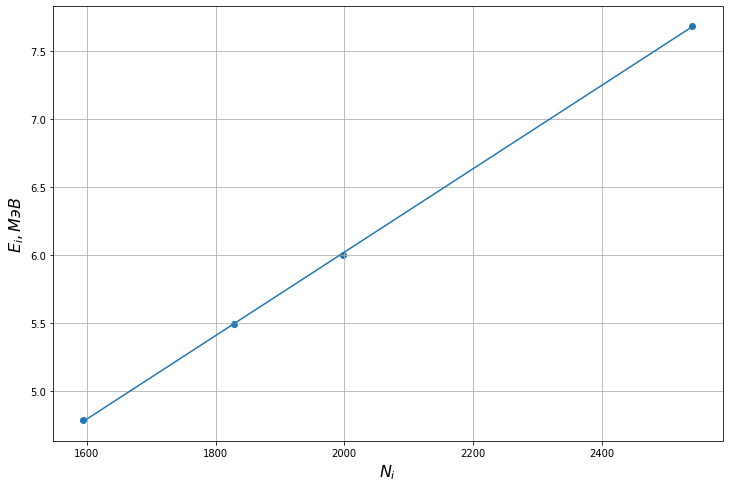

In [61]:
n_calib = ra.loc[ra.label.str.startswith('Max'), 'data'].values.astype(float)
e_calib = [4.784, 5.490, 6.002, 7.687]

(k_calib, b_calib), cov = np.polyfit(n_calib, e_calib, deg=1, cov=True)
cov = np.sqrt(cov.diagonal())

plt.scatter(n_calib, e_calib)
plt.plot(n_calib, n_calib*k_calib+b_calib)
plt.xlabel(r"$N_i$", fontsize=16)
plt.ylabel(r"$E_i, МэВ$", fontsize=16)
print(k_calib, b_calib, cov)

In [62]:
def toE(x):
    return x*k_calib + b_calib

(4.0, 8.0)

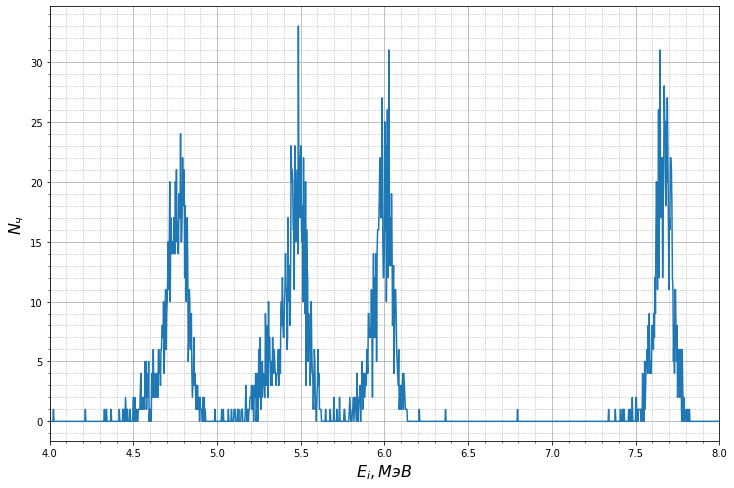

In [63]:
plt.plot(toE(ra.index), ra.amp.values)

plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.ylabel(r"$N_ч$", fontsize=16)
plt.xlabel(r"$E_i, МэВ$", fontsize=16)
plt.xlim(4, 8)

In [82]:
pu = pd.read_excel('./pu.xlsx', header=None)
pu.drop(columns=1, inplace=True)
pu.columns = ['amp', 'label', 'data']
pu.fillna('', inplace=True)
pu.head()

,amp,label,data
0,0,,
1,0,,
2,0,Max1,1738.639
3,0,HWHH,18.0629
4,0,Integral,6.734


(4.5, 6.0)

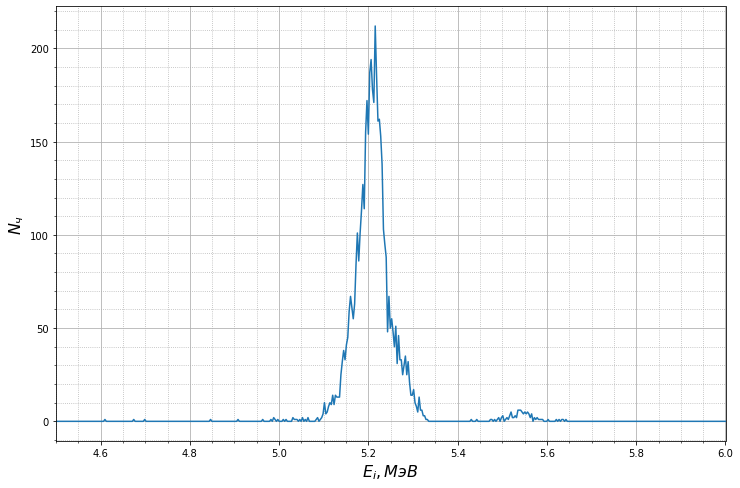

In [67]:
plt.plot(toE(pu.index), pu.amp.values)

plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.ylabel(r"$N_ч$", fontsize=16)
plt.xlabel(r"$E_i, МэВ$", fontsize=16)
plt.xlim(4.5, 6)

In [76]:
u = pd.read_excel('./u.xlsx', header=None)
u.drop(columns=1, inplace=True)
u.columns = ['amp', 'label', 'data']
u.fillna('', inplace=True)
u.head()

,amp,label,data
0,0,Max1,1388.36534
1,0,HWHH,49.67623
2,0,Integral,1.025753
3,0,,
4,0,Max2,1566.426348


(3.0, 6.0)

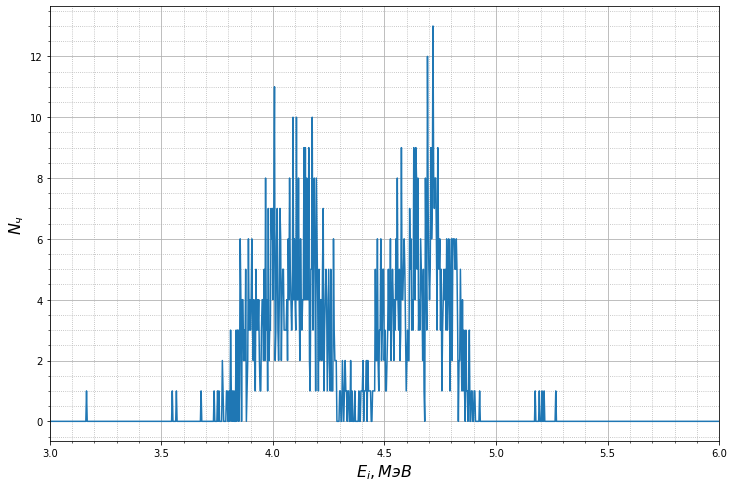

In [69]:
plt.plot(toE(u.index), u.amp.values)

plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.ylabel(r"$N_ч$", fontsize=16)
plt.xlabel(r"$E_i, МэВ$", fontsize=16)
plt.xlim(3, 6)

In [78]:
auth = pd.read_excel('./auth.xlsx', header=None)
auth.drop(columns=1, inplace=True)
auth.columns = ['amp', 'label', 'data']
auth.fillna('', inplace=True)
auth.head()

,amp,label,data
0,0,,
1,0,Max1,1581.10229
2,0,HWHH,17.9732
3,0,Integral,1.750395
4,0,,


(4.0, 6.0)

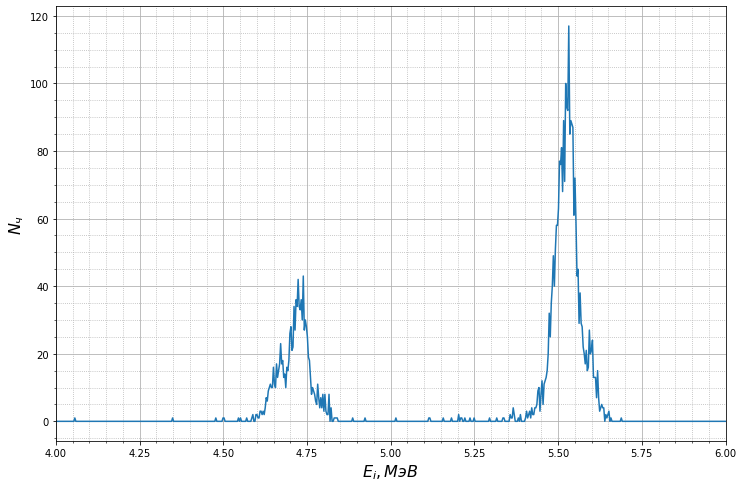

In [79]:
plt.plot(toE(auth.index), auth.amp.values)

plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':')
plt.ylabel(r"$N_ч$", fontsize=16)
plt.xlabel(r"$E_i, МэВ$", fontsize=16)
plt.xlim(4, 6)

In [96]:
tmp_maxes = []
tmp_hwhh = []
tmp_labels = []
for i, name in zip([pu, ra, auth, u], ['${ }^{239} \mathrm{Pu}$', '${ }^{226} \mathrm{Ra}$', '${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$', '${ }^{238} \mathrm{U}$']):
    tmp_maxes.extend(i.loc[i.label.str.startswith('Max'), 'data'].to_list())
    tmp_hwhh.extend(i.loc[i.label == 'HWHH', 'data'].to_list())
    tmp_labels.extend([name] * i.loc[i.label.str.startswith('Max'), 'data'].shape[0])

In [110]:
maximums = pd.DataFrame([tmp_maxes, tmp_hwhh], columns=tmp_labels).transpose()
maximums.index.name = 'Образец'
maximums.columns = ['$N_i$', '$\Delta N_i$']
maximums.loc[:, '$E_i$'] = toE(maximums['$N_i$'])
maximums.loc[:, '$\Delta E_i$'] = k_calib*(maximums['$\Delta N_i$'])
maximums.loc[:, '$R_i$'] = maximums.loc[:, '$\Delta N_i$']/maximums.loc[:, '$N_i$']
maximums.loc[:, '$R_\\text{фл}$'] = 1/np.sqrt(maximums.loc[:, '$E_i$']/3.6e-6)
maximums

,$N_i$,$\Delta N_i$,$E_i$,$\Delta E_i$,$R_i$,$R_\text{фл}$
Образец,,,,,,
${ }^{239} \mathrm{Pu}$,1738.639000,18.062900,5.217279,0.055519,0.010389,0.000831
${ }^{239} \mathrm{Pu}$,1845.024790,12.344749,5.544270,0.037943,0.006691,0.000806
${ }^{226} \mathrm{Ra}$,1594.687800,30.224000,4.774825,0.092898,0.018953,0.000868
${ }^{226} \mathrm{Ra}$,1828.163777,26.150090,5.492446,0.080376,0.014304,0.000810
${ }^{226} \mathrm{Ra}$,1998.107600,23.182700,6.014792,0.071255,0.011602,0.000774
${ }^{226} \mathrm{Ra}$,2540.183787,24.509950,7.680938,0.075335,0.009649,0.000685
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$,1581.102290,17.973200,4.733068,0.055243,0.011368,0.000872
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$,1841.891296,18.607554,5.534639,0.057193,0.010102,0.000807
${ }^{238} \mathrm{U}$,1388.365340,49.676230,4.140664,0.152687,0.035780,0.000932


In [111]:
print(
maximums.reset_index().style.format(precision=3, formatter={
    '$R_\\text{фл}$': "{:.2e}",
}).hide(axis=0).to_latex(
    hrules=True, position='c'
)
)

\begin{table}[c]
\begin{tabular}{lrrrrrr}
\toprule
Образец & $N_i$ & $\Delta N_i$ & $E_i$ & $\Delta E_i$ & $R_i$ & $R_\text{фл}$ \\
\midrule
${ }^{239} \mathrm{Pu}$ & 1738.639 & 18.063 & 5.217 & 0.056 & 0.010 & 8.31e-04 \\
${ }^{239} \mathrm{Pu}$ & 1845.025 & 12.345 & 5.544 & 0.038 & 0.007 & 8.06e-04 \\
${ }^{226} \mathrm{Ra}$ & 1594.688 & 30.224 & 4.775 & 0.093 & 0.019 & 8.68e-04 \\
${ }^{226} \mathrm{Ra}$ & 1828.164 & 26.150 & 5.492 & 0.080 & 0.014 & 8.10e-04 \\
${ }^{226} \mathrm{Ra}$ & 1998.108 & 23.183 & 6.015 & 0.071 & 0.012 & 7.74e-04 \\
${ }^{226} \mathrm{Ra}$ & 2540.184 & 24.510 & 7.681 & 0.075 & 0.010 & 6.85e-04 \\
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$ & 1581.102 & 17.973 & 4.733 & 0.055 & 0.011 & 8.72e-04 \\
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$ & 1841.891 & 18.608 & 5.535 & 0.057 & 0.010 & 8.07e-04 \\
${ }^{238} \mathrm{U}$ & 1388.365 & 49.676 & 4.141 & 0.153 & 0.036 & 9.32e-04 \\
${ }^{238} \mathrm{U}$ & 1566.426 & 69.002 & 4.688 & 0.212 & 0.044 & 8.76e-04 \\

In [113]:
-maximums.loc[:, '$R_\\text{фл}$'] + maximums.loc[:, '$R_i$']

Образец
${ }^{239} \mathrm{Pu}$                         0.009558
${ }^{239} \mathrm{Pu}$                         0.005885
${ }^{226} \mathrm{Ra}$                         0.018085
${ }^{226} \mathrm{Ra}$                         0.013494
${ }^{226} \mathrm{Ra}$                         0.010829
${ }^{226} \mathrm{Ra}$                         0.008964
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$    0.010495
${ }^{241} \mathrm{Am} + ^{230} \mathrm{Th}$    0.009296
${ }^{238} \mathrm{U}$                          0.034848
${ }^{238} \mathrm{U}$                          0.043174
dtype: float64

In [114]:
t = [1620*365.25*24*60, 3.82*24*60, 3.11, 1.63e-4/60]

149.57223634859957 -59.9056033977335 [9.15322031 3.79577423]


Text(0, 0.5, '$\\log{\\frac{T_{1/2}}{1 мин.}},$')

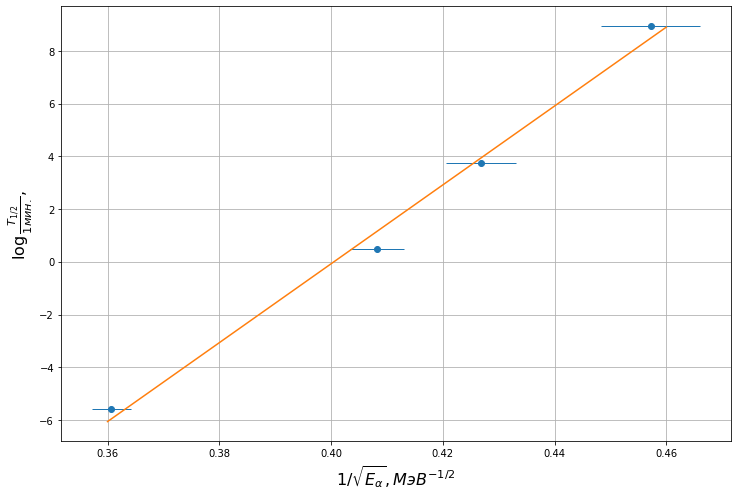

In [121]:
plt.errorbar(1/np.sqrt(e_calib), np.log10(t), xerr=maximums.loc['${ }^{226} \mathrm{Ra}$', '$\Delta E_i$']/e_calib/np.sqrt(e_calib),
    lw=0, marker='o', elinewidth=1)
(a, b), cov = np.polyfit(1/np.sqrt(e_calib), np.log10(t), deg=1, cov=True)
cov = np.sqrt(cov.diagonal())
print(a, b, cov)

var_e = np.linspace(0.36, 0.46, 10)
plt.plot(var_e, a*var_e+b)
plt.xlabel(r"$1/\sqrt{E_\alpha}, МэВ^{-1/2}$", fontsize=16)
plt.ylabel(r"$\log{\frac{T_{1/2}}{1 мин.}},$", fontsize=16)

In [151]:
inertia = (1.0545e-34)**2/((maximums.loc['${ }^{226} \mathrm{Ra}$', r'$E_i$'].values)*1.6e-19*1e6)

In [152]:
np.sqrt(inertia/(
    4*1.67e-27 #np.array([226, 222, 218, 214])
))

array([1.47611315e-15, 1.37630751e-15, 1.31518870e-15, 1.16383449e-15])

In [176]:
(1.0545e-34*np.pi)**2/(2*4*1.67e-27*(7.8e-15)**2)/1.6e-19/1e6

0.8438733413105091

In [178]:
(1.05*np.pi*1e-27)**2/(2*4*1.6e-24*8**2*1e-26)/(1.6e-12)/1e6

0.8301726419220747

In [187]:
(1.008665*74+1.007276*53 - (126.9045-0.0296))*931/127

8.444521874015756

126.8749